In [321]:
from lxml import html
import requests
from bs4 import BeautifulSoup
import pandas as pd

import seaborn as sns

import datetime

In [337]:
#where to look for a single race
url = 'http://ucsdtriathlon.org/race/Tritonman_Classic_2019/'

#get the html result from the url
response = requests.get(url).content

In [338]:
#convert to beautiful soup
soup = BeautifulSoup(response)

In [339]:
#find just the links on the page (I checked it to be sure these were all the race result files)
all_links_one_race = soup.find_all('a')
all_links_one_race

[<a href="?C=N;O=D">Name</a>,
 <a href="?C=M;O=A">Last modified</a>,
 <a href="?C=S;O=A">Size</a>,
 <a href="?C=D;O=A">Description</a>,
 <a href="/race/">Parent Directory</a>,
 <a href="Age%20Group-F.html">Age Group-F.html</a>,
 <a href="Age%20Group-M.html">Age Group-M.html</a>,
 <a href="All-F.html">All-F.html</a>,
 <a href="All-M.html">All-M.html</a>,
 <a href="Collegiate-F.html">Collegiate-F.html</a>,
 <a href="Collegiate-M.html">Collegiate-M.html</a>,
 <a href="DQ-F.html">DQ-F.html</a>,
 <a href="DQ-M.html">DQ-M.html</a>,
 <a href="Elite-F.html">Elite-F.html</a>,
 <a href="High%20School-F.html">High School-F.html</a>,
 <a href="High%20School-M.html">High School-M.html</a>,
 <a href="Paratriathlete-F.html">Paratriathlete-F.html</a>,
 <a href="Paratriathlete-M.html">Paratriathlete-M.html</a>,
 <a href="Relay.html">Relay.html</a>]

In [340]:
#get a dataframe from each results html
data={}
for link in all_links_one_race:
    try:
        d = pd.read_html(url + link['href'])[0]
        name = link.contents[0]
    except: #not all the links are html files, those will throw error, so just assigning those to burner entries
        d = None
        name = 'error'
    
    data.update({name : d})
    
#destroy burners
data.pop('error')

In [341]:
ds= []
for k in data:
    edit = data[k]
    
    #label each entry with the html file it came from
    edit['group'] = k.rstrip('.html')
    
    #get that properly formatted dataframe for concat later
    ds.append(edit)
    
    #keep the dict as well
    data[k] = edit
    
df = pd.concat(ds)

In [342]:
print(len(df['Bib #'].unique()), len(df['Name'].unique()))

417 416


strangely, there are more bib numbers than people in this race, why is that

In [343]:
for n in df['Name'].unique():
    g = df.loc[df['Name'] == n, ['Name', 'Bib #']]
    
    if len(g['Bib #'].unique()) > 1:
        print(n)

Lucia De Meo


these are the relay teams, which explains it

In [344]:
#drop the entries that don't have finish times, this will get rid of the extra relay entries as well as unusable data
df = df.loc[df['Finish'] != 'NT']

each person in this long table is in at least 2 groups, the All-gender group and their age group category like 25-39 or collegiate-M, but I really just want each person's entry once. I'd like to be able to separate into collegiate vs age groups, so I'll drop out the entries from the 'All-gender' groups

In [345]:
print(len(df['Bib #'].unique()), len(df['Name'].unique()))

370 370


now we're all square and each unique person should have a unique bib #

In [346]:
trimmed = []
for n in df['Name'].unique():
    #get each person's entries
    x = df.loc[df['Name'] == n]
    
    #these are the group assignments that contain "All", which are the less useful ones, so we'll drop them
    drops = ~x['group'].str.contains("All")

    add = x.loc[drops]
    
    trimmed.append(add)

In [347]:
df = pd.concat(trimmed)
df = df.reset_index(drop=True)

In [348]:
df

,OVR,Name,Bib #,Cat./School,Event 1,#,T1,#.1,Event 2,#.2,T2,#.3,Event 3,#.4,Finish,group
0,1,Marissa Platt,160,20-24,00:08:26,1,00:00:29,1,00:37:01,1,00:00:34,1,00:21:09,2,01:07:39,Age Group-F
1,2,Chelsea Vancott,572,25-29,00:08:50,2,00:00:56,5,00:41:39,3,00:00:54,6,00:23:14,4,01:15:33,Age Group-F
2,3,Kaitlin Dowgin,569,30-34,00:09:14,4,00:00:59,7,00:43:58,6,00:00:46,5,00:22:34,3,01:17:31,Age Group-F
3,4,Kerri Seger,571,35-39,00:10:04,6,00:00:56,5,00:42:47,4,00:00:37,3,00:25:20,7,01:19:44,Age Group-F
4,5,Kathy Spencer,567,50-54,00:11:07,8,00:00:40,2,00:41:34,2,00:00:36,2,00:26:04,8,01:20:01,Age Group-F
5,6,Maya Bryson,565,40-44,00:10:01,5,00:00:42,4,00:45:21,7,00:00:54,6,00:24:50,6,01:21:48,Age Group-F
6,7,Haley Platt,158,19&under,00:09:05,3,00:00:40,2,00:48:52,10,00:00:38,4,00:23:20,5,01:22:35,Age Group-F
7,8,Brittany Fair,568,30-34,00:10:38,7,00:01:13,9,00:46:46,8,00:00:58,9,00:26:05,9,01:25:40,Age Group-F
8,9,Summer Miller,605,45-49,00:11:37,10,00:01:05,8,00:43:52,5,00:00:57,8,00:28:53,10,01:26:24,Age Group-F
9,10,Lucia De Meo,561,19& under,00:11:25,9,00:01:36,12,00:57:33,12,00:01:45,11,00:20:33,1,01:32:52,Age Group-F


In [349]:
df['gend'] = df['group'].str.split('-', expand=True)[1]

In [350]:
df

,OVR,Name,Bib #,Cat./School,Event 1,#,T1,#.1,Event 2,#.2,T2,#.3,Event 3,#.4,Finish,group,gend
0,1,Marissa Platt,160,20-24,00:08:26,1,00:00:29,1,00:37:01,1,00:00:34,1,00:21:09,2,01:07:39,Age Group-F,F
1,2,Chelsea Vancott,572,25-29,00:08:50,2,00:00:56,5,00:41:39,3,00:00:54,6,00:23:14,4,01:15:33,Age Group-F,F
2,3,Kaitlin Dowgin,569,30-34,00:09:14,4,00:00:59,7,00:43:58,6,00:00:46,5,00:22:34,3,01:17:31,Age Group-F,F
3,4,Kerri Seger,571,35-39,00:10:04,6,00:00:56,5,00:42:47,4,00:00:37,3,00:25:20,7,01:19:44,Age Group-F,F
4,5,Kathy Spencer,567,50-54,00:11:07,8,00:00:40,2,00:41:34,2,00:00:36,2,00:26:04,8,01:20:01,Age Group-F,F
5,6,Maya Bryson,565,40-44,00:10:01,5,00:00:42,4,00:45:21,7,00:00:54,6,00:24:50,6,01:21:48,Age Group-F,F
6,7,Haley Platt,158,19&under,00:09:05,3,00:00:40,2,00:48:52,10,00:00:38,4,00:23:20,5,01:22:35,Age Group-F,F
7,8,Brittany Fair,568,30-34,00:10:38,7,00:01:13,9,00:46:46,8,00:00:58,9,00:26:05,9,01:25:40,Age Group-F,F
8,9,Summer Miller,605,45-49,00:11:37,10,00:01:05,8,00:43:52,5,00:00:57,8,00:28:53,10,01:26:24,Age Group-F,F
9,10,Lucia De Meo,561,19& under,00:11:25,9,00:01:36,12,00:57:33,12,00:01:45,11,00:20:33,1,01:32:52,Age Group-F,F


In [267]:
def get_time (entry):
    hours, minutes, sec = entry.split(':')
    
    time = int(hours)*60*60 + int(minutes)*60 + int(sec)
    
    return time

In [268]:
df['Finish'] = df['Finish'].apply(get_time)

ValueError: not enough values to unpack (expected 3, got 1)

In [242]:
df

,OVR,Name,Bib #,Cat./School,Event 1,#,T1,#.1,Event 2,#.2,T2,#.3,Event 3,#.4,Finish,group,gend
0,1,Jennifer Campbell,587,20-24,00:11:31,1,00:01:04,1,00:38:18,1,00:00:52,1,00:20:42,1,4347,Age Group-F,F
1,2,Adrienne Law,607,30-34,00:15:28,2,00:01:49,9,00:41:08,5,00:01:13,6,00:23:39,2,4997,Age Group-F,F
2,3,Brittany Hempel,599,25-29,00:17:56,6,00:01:31,4,00:39:12,2,00:00:53,2,00:24:59,7,5071,Age Group-F,F
3,4,Kerri Seger,612,35-39,00:17:55,5,00:01:19,3,00:40:20,4,00:00:53,2,00:24:39,5,5106,Age Group-F,F
4,5,Lilias Young,619,45-49,00:17:52,3,00:01:46,8,00:39:32,3,00:02:19,25,00:24:45,6,5174,Age Group-F,F
5,6,Maya Bryson,586,45-49,00:20:01,12,00:01:42,6,00:41:33,6,00:01:22,9,00:24:31,4,5349,Age Group-F,F
6,7,Elle Steiner,616,45-49,00:18:49,9,00:02:11,11,00:43:36,9,00:01:51,20,00:23:52,3,5419,Age Group-F,F
7,8,Heather Hedstrom,598,50-54,00:17:54,4,00:01:43,7,00:44:03,10,00:01:43,16,00:25:20,8,5443,Age Group-F,F
8,9,Sylvia Depta,593,50-54,00:18:23,8,00:02:42,12,00:42:30,7,00:02:25,26,00:29:26,17,5726,Age Group-F,F
9,10,Alexandra Foley,596,30-34,NT,28,NT,28,NT,28,NT,28,01:37:26,28,5846,Age Group-F,F


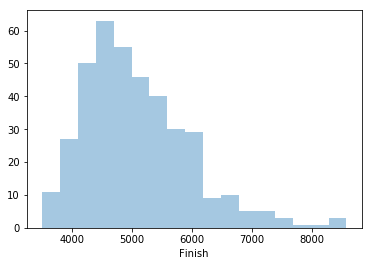

In [244]:
sns.distplot(df['Finish'], kde=False)

In [351]:
df.to_csv('20190216 tritonman classic resultsc.csv')



for visualization ideas

https://www.coachcox.co.uk/ (ironman argentina)

https://medium.com/analytics-vidhya/how-i-used-data-science-skills-to-become-triathlon-athlete-c6e17c5c652c (pairplot)